Eigenvalues:
Eigenvalue 1: 3.499999999999999
Eigenvalue 2: 6.661338147750941e-16
Eigenvalue 3: -4.437342591868191e-31


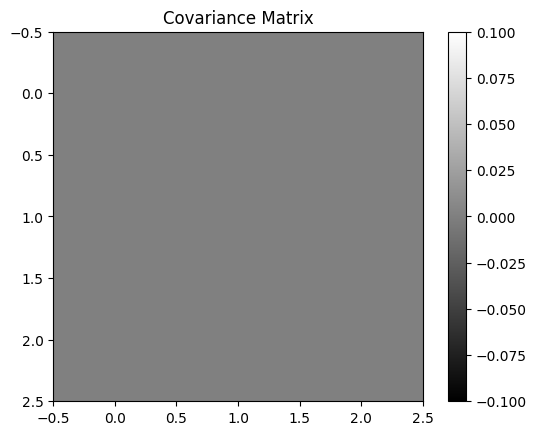

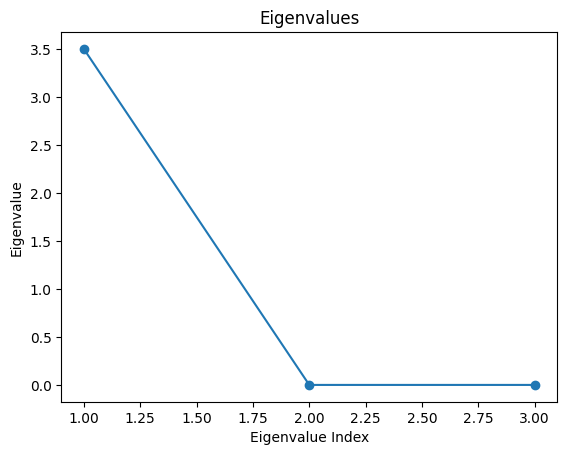

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def power_iteration(matrix, num_iterations, convergence_threshold=1e-6):
    # Generate a random initial vector
    vector = np.random.randn(matrix.shape[0])

    for _ in range(num_iterations):
        # Perform matrix-vector multiplication
        vector = matrix @ vector

        # Normalize the vector
        vector /= np.linalg.norm(vector)

    # Compute the eigenvalue using Rayleigh quotient
    eigenvalue = vector @ (matrix @ vector)

    return eigenvalue, vector

def calculate_eigenvalues(matrix, num_eigenvalues):
    eigenvalues = []
    eigenvectors = []

    for _ in range(num_eigenvalues):
        eigenvalue, eigenvector = power_iteration(matrix, num_iterations=100)
        eigenvalues.append(eigenvalue)
        eigenvectors.append(eigenvector)

        # Deflate the matrix
        matrix -= eigenvalue * np.outer(eigenvector, eigenvector)

    return np.array(eigenvalues), np.array(eigenvectors)

# Example usage:
dataset = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15], [16, 17, 18], [19, 20, 21]])

# Normalize the dataset
normalized_dataset = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)

# Calculate the covariance matrix
cov_matrix = np.cov(normalized_dataset, rowvar=False)

# Determine the maximum number of eigenvalues
num_eigenvalues = min(cov_matrix.shape)

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = calculate_eigenvalues(cov_matrix, num_eigenvalues)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Print the eigenvalues
print("Eigenvalues:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Eigenvalue {i+1}: {eigenvalue}")
# Plot the matrix values
plt.imshow(cov_matrix, cmap='gray', interpolation='nearest')
plt.title("Covariance Matrix")
plt.colorbar()
plt.show()

# Plot the eigenvalues
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues')
plt.show()

